# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for null values done. 0 null values found !. 

# Display summary statistics
print(df.describe())

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.140000  
50%        24.780000      48.350000

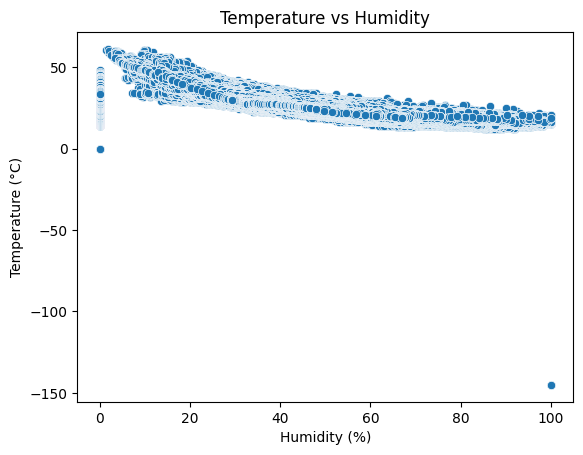

In [ ]:
# After looking at the statistics we see, the min Temperature is -145.12°C which is impossible hence it is an * outlier *
# That -145.12°C temperature is a problem. It can pull the regression line way off.
# Let’s Scatter plot and then decide whether to remove that outlier.

# Scatter plot to observe relationship
sns.scatterplot(x= 'humidity', y='temperature', data=df)
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()  

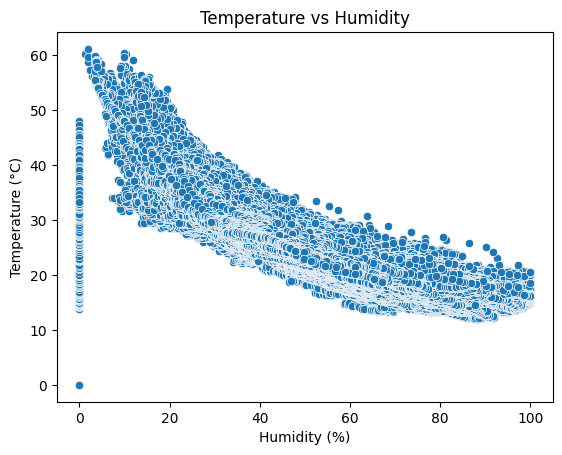

In [42]:
# Above we can see that one outlier is disrupting the plot let's get that out.
df = df [df['temperature'] > -50]  

#plotting the graph again 

sns.scatterplot(x= 'humidity', y='temperature', data=df)
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()  

## Data Preprocessing

In [ ]:
# Drop any rows with missing values
df = df.dropna()

# Define features and target
X = df[['humidity','pressure']]
y = df['temperature']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print(f"Training data size : {len(X_train)}")
print(f"Test data size : {len(X_test)}")

Training data size : 558245
Test data size : 139562


## Model Training

In [47]:
# Linear Regression
model = LinearRegression()

model.fit(X_train,y_train)

# Predict

Predictions = model.predict(X_test)
print("Prediction :", Predictions)

Prediction : [30.95078843 18.58879857 28.15128175 ... 24.22711454 28.87511095
 33.08384258]


## Evaluation


In [48]:
# Evaluate model performance
mse = mean_squared_error(y_test, Predictions)
r2 = r2_score(y_test, Predictions)

print(f"Mean Squared Error : {mse}")
print(f"r2_score : {r2}")

Mean Squared Error : 16.829479497314935
r2_score : 0.597886494315564


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
